In [1]:
!pip install matplotlib
!pip install seaborn

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv("./bmi.csv")
df = data
df.head()

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3


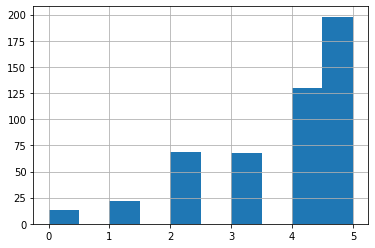

In [4]:
df['Index'].hist()
plt.show()

## 성별 변환

In [5]:
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [6]:
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [7]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['Gender'])

df

,Gender,Height,Weight,Index,gender
0,Male,174,96,4,1
1,Male,189,87,2,1
2,Female,185,110,4,0
3,Female,195,104,3,0
4,Male,149,61,3,1
...,...,...,...,...,...
495,Female,150,153,5,0
496,Female,184,121,4,0
497,Female,141,136,5,0
498,Male,150,95,5,1


In [8]:
df["Height"] = df["Height"] / 100
df["Weight"] = df["Weight"] / 100

In [9]:
df

,Gender,Height,Weight,Index,gender
0,Male,1.74,0.96,4,1
1,Male,1.89,0.87,2,1
2,Female,1.85,1.10,4,0
3,Female,1.95,1.04,3,0
4,Male,1.49,0.61,3,1
...,...,...,...,...,...
495,Female,1.50,1.53,5,0
496,Female,1.84,1.21,4,0
497,Female,1.41,1.36,5,0
498,Male,1.50,0.95,5,1


In [10]:
X = df.drop(["Index", "Gender"], axis="columns")
y = df["Index"]

In [11]:
print(X.head())
print('-'*20)
print(y.head())

   Height  Weight  gender
0    1.74    0.96       1
1    1.89    0.87       1
2    1.85    1.10       0
3    1.95    1.04       0
4    1.49    0.61       1
--------------------
0    4
1    2
2    4
3    3
4    3
Name: Index, dtype: int64


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)


* k근접이웃

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
nei = KNeighborsClassifier(n_neighbors=5)

nei.fit(X_train,y_train)

KNeighborsClassifier()

In [15]:
score = nei.score(X_test,y_test)
print(score)

0.8666666666666667


* 랜덤포레스트

In [136]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train, y_train)

new =model.score(X_test,y_test)
print(new)

0.88


In [141]:
prediction = loaded_model.predict(X)


<class 'pandas.core.frame.DataFrame'>


## 키,몸무게,성별 -> 판단 함수

In [132]:
def info_to_idx(height,weight,gender):
    height,weight =     height/100,weight /100
    check = pd.DataFrame(columns=['Height','Weight','gender'])
    print(check)
    data_to_insert = {'Height':height,'Weight':weight,'gender':gender}
    new = check.append(data_to_insert, ignore_index=True)
#     print(new)
#     print(nei.predict(new))
    print("new",new)
    if 1 in nei.predict(new):
        return '깡마름'
    if 2 in nei.predict(new):
        return '마름'
    if 3 in nei.predict(new):
        return '보통'
    if 4 in nei.predict(new):
        return '통통'
    if 5 in nei.predict(new):
        return '뚱뚱'
    
   
    

In [133]:
height,weight,gender = map(int,input().split())

info_to_idx(height,weight,gender)

170 70 1
Empty DataFrame
Columns: [Height, Weight, gender]
Index: []
new    Height  Weight  gender
0     1.7     0.7     1.0


'보통'

### 모델 저장 정리

In [121]:
import pickle
import joblib

saved_model = pickle.dumps(model)
from_pickled = pickle.loads(saved_model)

In [122]:
print(type(from_pickled.predict(X)))
from_pickled.predict(X)
joblib.dump(model,'bmimodel.pkl')

<class 'numpy.ndarray'>


['bmimodel.pkl']

In [126]:
from_joblib = joblib.load('bmimodel.pkl')
from_joblib.predict(X)
print(X)
# from_joblib.predict([[120,10,1]])

     Height  Weight  gender
0      1.74    0.96       1
1      1.89    0.87       1
2      1.85    1.10       0
3      1.95    1.04       0
4      1.49    0.61       1
..      ...     ...     ...
495    1.50    1.53       0
496    1.84    1.21       0
497    1.41    1.36       0
498    1.50    0.95       1
499    1.73    1.31       1

[500 rows x 3 columns]


# for django view

In [148]:
def info_to_rule(height,weight,gender):
    height,weight =     height/100,weight /100
    check = pd.DataFrame(columns=['Height','Weight','gender'])
#     print(check)
    data_to_insert = {'Height':height,'Weight':weight,'gender':gender}
    new = check.append(data_to_insert, ignore_index=True)
    return new

In [157]:
model_features = [[height,weight,gender]]


loaded_model = joblib.load('bmimodel.pkl')



prediction = loaded_model.predict(info_to_rule(170,70,1))

        
prediction_dict = [{'1': '깡마름'}, 
                   {'2': '마름'},
                   {'3': '보통'},
                   {'4': '통통'},
                   {'5': '뚱뚱'},]
print(prediction)
# prediction_name = prediction_dict[prediction]

# print(prediction_name)

[3]
